In [1]:
from astropy.io import fits
from astropy.table import Table
from astronify import simulator, series


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



Let's start off with a simulated light curve that has almost no variation at all, to orient ourselves.  We'll use the simulator to create a "flat" light curve with almost zero noise (specified via the noise parameter).  The length parameter specifies how long we want our light curve to be.  Setting visualize to True means a plot will be made showing the fluxes (brightness) as a function of time.  The yoffset parameter is used to specify the baseline brightness level.

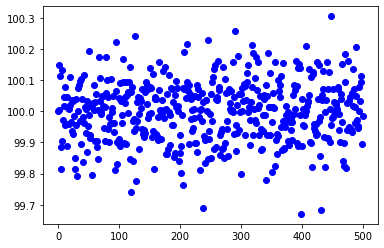

In [2]:
lc_data = simulator.simulated_lc("flat", lc_length=500, lc_noise=0.1, visualize=True, lc_yoffset=100.)

Now let's create a sonified version of the data!

In [3]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()

And now let's listen to the sound!

In [4]:
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


You can inject different amounts of noise.  Let's make a light curve with a lot of noise.  In our first example, we used a value of 0.1 for the noise parameter.  Now we'll make a light curve with 1000 times the level of noise.

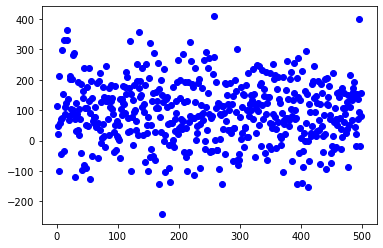

In [5]:
lc_data = simulator.simulated_lc("flat", lc_length=500, lc_noise=100., visualize=True, lc_yoffset=100.)

Let's sonify this light curve and listen to it.

In [6]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


You can also use the simulator to inject signals of different types.  Let's inject a signal expected from a transiting extrasolar planet.  For now, we will use all the defaults for the parameters.

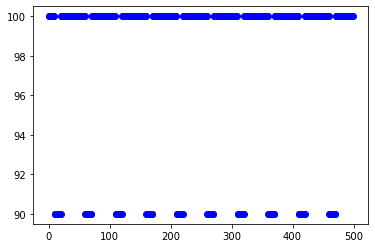

In [7]:
lc_data = simulator.simulated_lc("transit", visualize=True, transit_width=10)

Let's sonify this light curve and see if we can hear the drop in brightness caused by the planet blocking a very small part of the star's surface when it passes in front of the star.

In [8]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.pitch_mapper.pitch_map_args["zero_point"] = 95.
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


Now let's explore the options when adding a transiting extrasolar planet signal.  We will specify the depth of the transit (how much the planet blocks), the period (how long it takes the planet to make one full pass around the star), and the width (how long the planet takes to cross the star's surface).  We'll also add some noise to the light curve, and finally ask for a slightly longer light curve so we can get more opportunities to have the planet cross in front of the star.

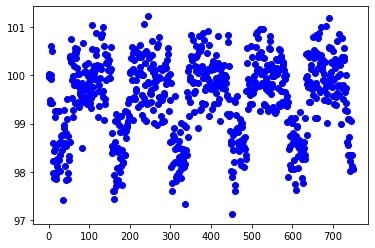

In [9]:
lc_data = simulator.simulated_lc("transit", visualize=True, transit_depth=1.5, transit_period=145,
                                 transit_width=42, lc_noise=0.5, lc_length=750)

Let's sonify this light curve!

In [10]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.pitch_mapper.pitch_map_args["zero_point"] = 99.
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


You can add a stellar flare to the data.  Let's add one using the default parameters.  Stellar flares are sudden increases in brightness over a short time.

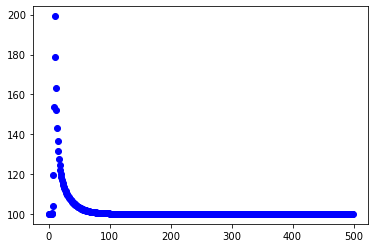

In [11]:
lc_data = simulator.simulated_lc("flare", visualize=True)

Time to sonify!

In [12]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


You can change the amplitude (height) of the flare, and the width.  Let's make one that is 10 times larger in amplitude and lasts 10 times as long.  You can also specify the index that corresponds to the peak of the flare.

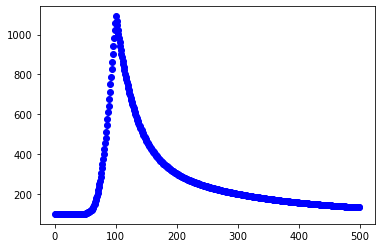

In [13]:
lc_data = simulator.simulated_lc("flare", visualize=True, flare_amp=1000., flare_halfwidth=50, flare_time=100)

Let's give it a listen.

In [14]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


You can also add sinusoidal signals to the data.  Let's create a light curve like this using the default parameters.

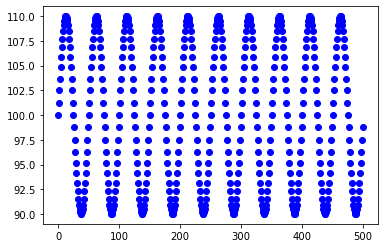

In [15]:
lc_data = simulator.simulated_lc("sine", visualize=True)

Let's sonify this light curve and listen to it.

In [16]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


Now let's make a sinusoidal signal and use some of the parameter options.  We will change the amplitude (how "big" the curve is from top to bottom), and the period (how long it takes to make one full cycle from peak to bottom and back to peak again).  We'll also add a little noise to the light curve, and ask for a light curve that lasts twice as long as the default.

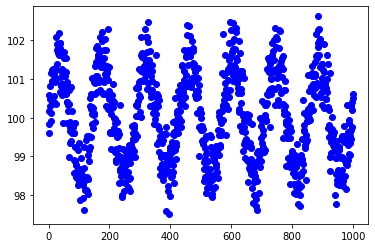

In [17]:
lc_data = simulator.simulated_lc("sine", visualize=True, sine_amp=1.5, sine_period=142, lc_noise=0.5, lc_length=1000)

Let's sonify this.

In [18]:
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


If you would like to save a light curve you create with the simulator to a file for use later, you can specify an output file name and a FITS file will be created that will store the parameters you used to create the light curve, as well as the times, fluxes, and fluxes without noise added.  Let's do that now using the call above (and we won't ask for a plot this time).  Note: because noise is added randomly, it won't be exactly the same as the one above, but will be close enough.

In [19]:
lc_data = simulator.simulated_lc("sine", lc_ofile="sim_lc_sine.fits", visualize=False, sine_amp=1.5, sine_period=142,
                                 lc_noise=0.5, lc_length=1000)